# Classification with MNIST Dataset

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False) # as_frame=False means, return data as NumPy arrays

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
y[43:]

array(['9', '3', '9', ..., '4', '5', '6'], dtype=object)

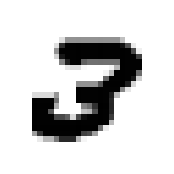

'3'

In [ ]:
# Visualize some images
import matplotlib.pyplot as plt

def plot_image(indx, dataset=X):
  image = dataset[indx].reshape(28, 28)
  plt.figure(figsize=(2, 2))
  plt.imshow(image, cmap="binary")
  plt.axis("off")
  plt.show()

indx = 42255
plot_image(indx)
y[indx]

In [ ]:
# MNIST dataset is already splitted into train and test sets

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Let's create 3-detector

In [ ]:
# Create y dataset with True for 3 and False for the rest
y_train_3 = (y_train == '3')
y_test_3 = (y_test == '3')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([X[3]])

array([False])

# Performance Measures

In [ ]:
# Let's check it with k-fold cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier() # Classifies everythign as False

dummy_clf.fit(X_train, y_train_3)

print(any(dummy_clf.predict(X_train))) # There is no True

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.89785, 0.8978 , 0.8978 ])

In [ ]:
# Implementing Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

strat_kfold = StratifiedKFold(n_splits=3)

for train_indices, test_indices in strat_kfold.split(X_train, y_train_3):
  X_train_folds, y_train_folds = X_train[train_indices], y_train_3[train_indices]
  X_test_folds, y_test_folds = X_train[test_indices], y_train_3[test_indices]
  classifier = clone(sgd_clf)
  classifier.fit(X_train_folds, y_train_folds)

  preds = classifier.predict(X_test_folds)
  print(sum(y_test_folds == preds) / len(X_test_folds))

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

In [ ]:
y_train_pred

(60000,)

In [ ]:
# Confusion matrix shows confusions (mismatches)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_3, y_train_pred)
cm # Each row is actual class, each column a predicted class TN(True Negative), FP, FN, TP
#       (predicted as) -> non 3 | 3
# non 3                     X     X
#     3                     X     X

# perfect matrix has non-zeros only at it's diagonal

array([[53477,   392],
       [ 2113,  4018]])

In [ ]:
confusion_matrix(y_train_3, y_train_3)

array([[53869,     0],
       [    0,  6131]])

In [ ]:
## Precision - accuracy of positive predictions
## Recall - ratio of TP (how good can classifier detects 3)
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_3, y_train_pred), recall_score(y_train_3, y_train_pred), f1_score(y_train_3, y_train_pred)

ValueError: Mix of label input types (string and number)

In [ ]:
y[44]

'3'

In [ ]:
# Play with threshold
y_score = sgd_clf.decision_function([X[44]]) # were y of this X is 3
threshold = 0
y_score > threshold

array([ True])

In [ ]:
threshold = 4000
y_score > threshold

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method="decision_function")
y_scores

array([ -8938.67345168, -17073.83659907,  -2250.42625883, ...,
       -15330.33317379, -25099.35767753, -36457.78038114])

In [ ]:
y_scores

array([ -8938.67345168, -17073.83659907,  -2250.42625883, ...,
       -15330.33317379, -25099.35767753, -36457.78038114])

In [ ]:
# Let's compute precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

In [ ]:
thresholds, precisions, recalls

(array([-121176.42566161, -117660.01398852, -114292.46378833, ...,
          32403.12479503,   32584.88725194,   39007.59733854]),
 array([0.10218333, 0.10218504, 0.10218674, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.26211059e-04, 1.63105529e-04, 0.00000000e+00]))

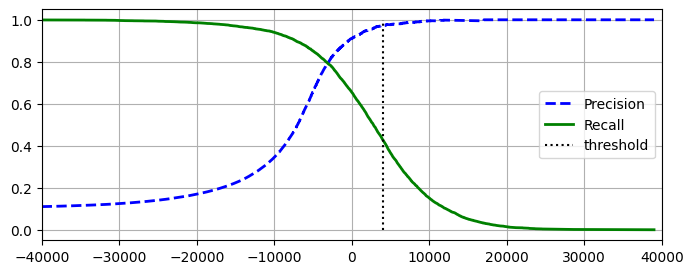

In [ ]:
# Visualize it
plt.figure(figsize=(8, 3))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()
plt.grid(True)
plt.xlim(-40000, 40000)
plt.show()

In [ ]:
# Let's find 90% precision for lowest threshold
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(-411.44326592496236)

In [ ]:
len(y_scores)

60000

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision) # return True if more than threshold for 90% precision
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [ ]:
precision_score(y_train_3, y_train_pred_90)

0.9000870700914236

In [ ]:
recall_at_90_precision = recall_score(y_train_3, y_train_pred_90)
recall_at_90_precision

0.6744413635622247

In [ ]:
idx_for_90_recall = (recalls >= 0.90).argmax()
threshold_for_90_recall = thresholds[idx_for_90_recall]

In [ ]:
recalls[idx_for_90_recall]

np.float64(1.0)

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_recall) # return true if more than threshold for 90% recall
recall_score(y_train_3, y_train_pred_90)

1.0

In [ ]:
# Let's compute ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_3, y_scores) # tpr is also recall

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
tpr_90

np.float64(0.6744413635622247)

In [ ]:
# ROC AUC in perfect model is equal to 1
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3, y_scores)

np.float64(0.9599243001892759)

In [ ]:
# Let's do it with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
# There is no decision_function() method in RandomForestClassifier, so use predict_proba() instead
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3, method="predict_proba") # returns probabilities

In [ ]:
y_probas_forest[:2]

array([[0.62, 0.38],
       [1.  , 0.  ]])

In [ ]:
# Pass second column (positive) to precision_recall_curve()
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_3, y_scores_forest)

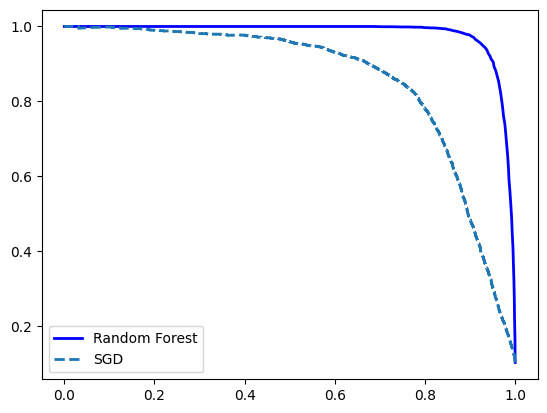

In [ ]:
# Random Forest is better, because the curve is more to the top-right corner and it has greater AUC (which is the same)
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.legend()

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_3, y_train_pred_forest)

0.9105216622458002

In [ ]:
print(f"Random Forest: {roc_auc_score(y_train_3, y_scores_forest)} | SGD {roc_auc_score(y_train_3, y_scores)}")

Random Forest: 0.995864544068936 | SGD 0.9599243001892759


In [ ]:
# Let's train on SVC
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train, not y_train_3

SVC(random_state=42)

In [ ]:
svm_clf.predict([X[1]])

array(['0'], dtype=object)

In [ ]:
# For each class SVM has it's own score. It chooses the highest score for output
some_digit_scores = svm_clf.decision_function([X[1]])
some_digit_scores.round(2)

array([[ 9.31, -0.29,  6.14,  7.21,  0.71,  8.28,  3.8 ,  1.77,  2.77,
         5.11]])

In [ ]:
#You can look at the classes
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
# But it was OvO, so to make it OvR use OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([X[1]])

array(['0'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
# Let's try some scaling for X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(ovr_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9616 , 0.95895, 0.96205])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

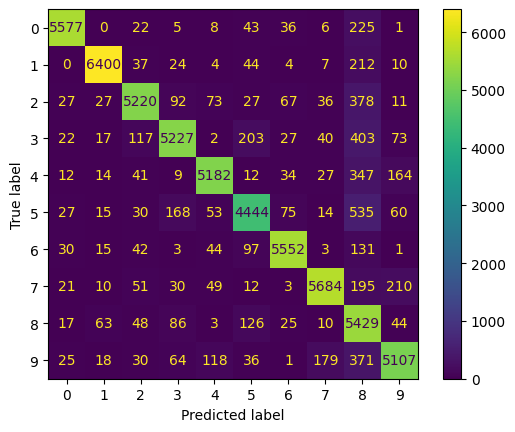

In [ ]:
# Let's create a confusion matrix, this time with all 10 classes
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

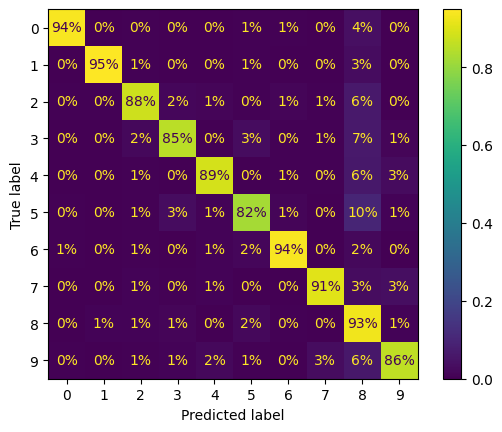

In [ ]:
# Let's normalize confusion matrix values
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

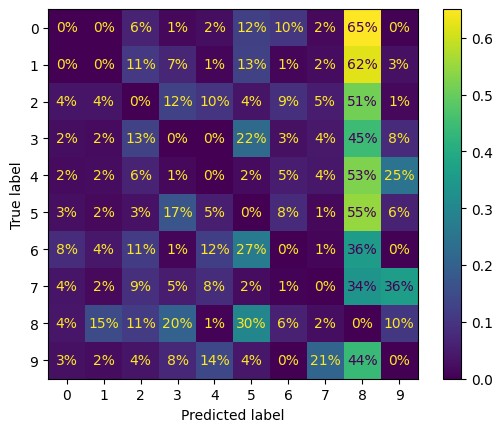

In [ ]:
# To plot the error percentages use zero weight on correct predictions (each cell represents percentage of all errors for this particular class )
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%", sample_weight=sample_weight)
plt.show()

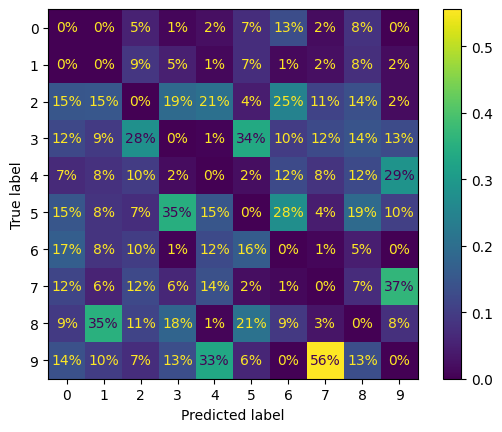

In [ ]:
# Normalize confusion matrix by column
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="pred", values_format=".0%", sample_weight=sample_weight)
plt.show()

In [ ]:
# Let's train KNN to classify is the number large and odd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_is_large = (y_train >= '7')
y_train_is_odd = (y_train.astype('int8') % 2 != 0)
y_multilabel = np.c_[y_train_is_large, y_train_is_odd] # like zip but with lists instead of tuples
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([X[1]])

array([[False, False]])

In [ ]:
# Measure teh F1 score for each label
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [ ]:
# Let's use our previous prediction to fit the model with ClassifierChain
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:500], y_multilabel[:500])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:

chain_clf.predict([X[0]])

array([[0., 1.]])

# Multioutput Classification

Remove noise from the images

In [ ]:
# Let's add some noise
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
print(f"Noise shape: {noise.shape}")
X_train_noisy = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
print(f"Noise shape: {noise.shape}")
X_test_noisy = X_test + noise

Noise shape: (60000, 784)
Noise shape: (10000, 784)


In [ ]:
y_train_clean = X_train
y_test_clean = X_test

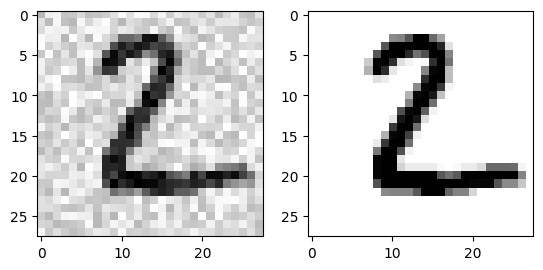

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(X_test_noisy[1].reshape(28, 28), cmap="binary")
plt.subplot(1, 2, 2)
plt.imshow(X_test[1].reshape(28, 28), cmap="binary")
plt.show()

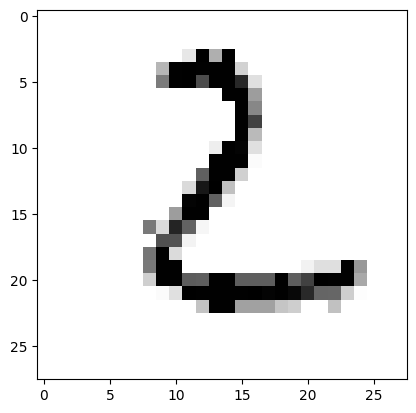

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_noisy, y_train_clean)
clean_output = knn_clf.predict([X_test_noisy[1]])
plt.imshow(clean_output.reshape(28, 28), cmap="binary")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_dist = {'n_neighbors': [10, 20, 30], 'weights': ['uniform', 'distance']}

knn_clf = KNeighborsClassifier()
# knn_clf.fit(X_train, y_train)

grid_search = GridSearchCV(knn_clf, param_dist, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 20, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
from sklearn.model_selection import cross_val_score

final_model = grid_search.best_estimator_
cross_val_score(final_model, X_test, y_test, cv=5, scoring="accuracy")

array([0.9165, 0.9225, 0.9365, 0.9635, 0.9595])

In [ ]:
y_preds = final_model.predict(X_test)

In [ ]:
accuracy_score(y_test, KNeighborsClassifier(n_neighbors=3, weights="distance").fit(X_train, y_train).predict(X_test))

0.9717

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.9684

In [ ]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# Positioning data augmentaion
from scipy.ndimage.interpolation import shift

def change_position(image, vertical=0, horizontal=0):
  return shift(image, [vertical, horizontal])

X_up = [change_position(i, vertical=25) for i in X[:3000]]
X_down = [change_position(i, vertical=-25) for i in X[15000:18000]]
X_right = [change_position(i, horizontal=25) for i in X[20000:23000]]
X_left = [change_position(i, horizontal=-25) for i in X[30000:32000]]

<ipython-input-111-c50379b1544a>:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [ ]:
X_train_mixed = X_T